In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

%matplotlib inline

url = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)

In [100]:
df.shape
df.dtypes
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.70,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.70,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.70,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.70,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.60,1881,17.99,False,0,Hi-Fi Speakers


In [101]:
list(set(df.dtypes.tolist()))
df.select_dtypes("number").columns
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [102]:
df.select_dtypes("object").columns
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [103]:
frequency_table = df['category'].value_counts()

top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

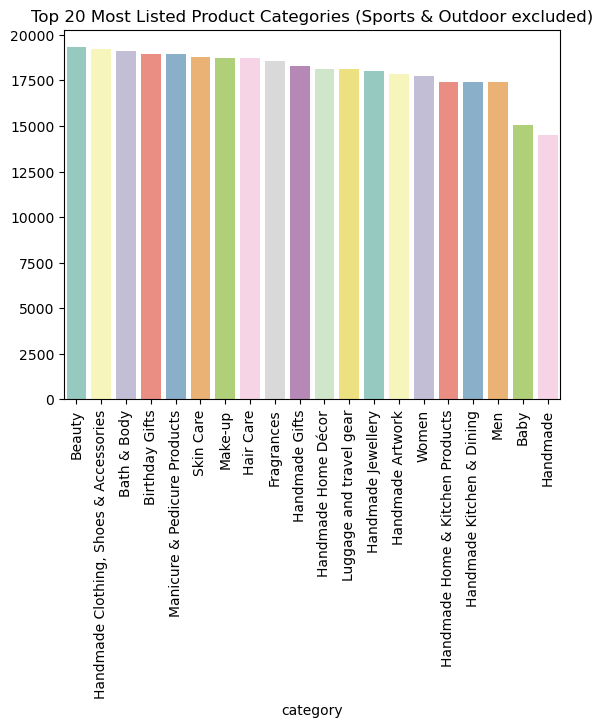

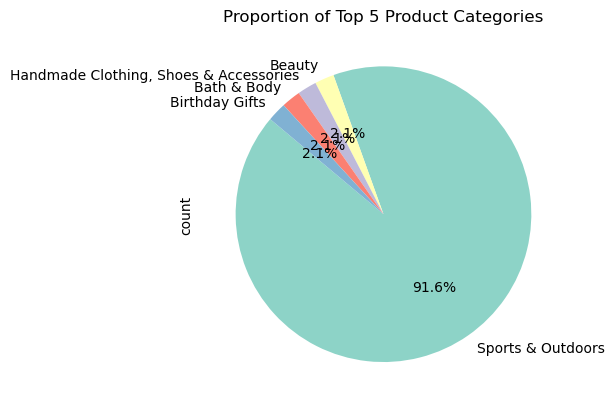

In [104]:
# Bar chart for frequency table
# select all values, except for the first big one (Sports & Outdoor)
frequency_table = frequency_table[1:21]
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3", hue=frequency_table.index, legend=False);
plt.title('Top 20 Most Listed Product Categories (Sports & Outdoor excluded)')
plt.xticks(rotation=90)
plt.show()


# Pie chart for top categories
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Proportion of Top 5 Product Categories')
plt.show()

In [112]:
product_pricing = df['price']
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.00,2443651.00,2443651.00,2443651.00,2443651.00
mean,1370545.35,2.15,480.63,89.24,25.90
std,816056.17,2.19,5944.12,345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,658921.50,0.00,0.00,9.99,0.00
50%,1349029.00,0.00,0.00,19.09,0.00
75%,2060685.50,4.40,59.00,45.99,0.00
max,2828593.00,5.00,1356658.00,100000.00,50000.00


In [116]:
# calculate mode
statistics.mode(product_pricing)

9.99

The average (mean) sale price of the products in the dataset is approximately £89,24.

The mode sale price stands at £9,99. The average is notably higher, indicating there are potential outliers, that pull the average away from the mode. 

The median sale price (middle value when sorted) stands at £19,09. Notably, the median is lower than the mean, suggesting a skew in the distribution of sale prices towards higher values.

The standard deviation, a measure of the amount of variation or dispersion in the sale prices, is approximately £345.61. This indicates that sale prices can vary significantly from the average.

The minimum and maximum sale prices are £00,00 and £100000,00, respectively, highlighting a wide range of product values in the dataset.

The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between £9,99 and £45,99. This means that 50% of the products in the dataset were sold within this price range.

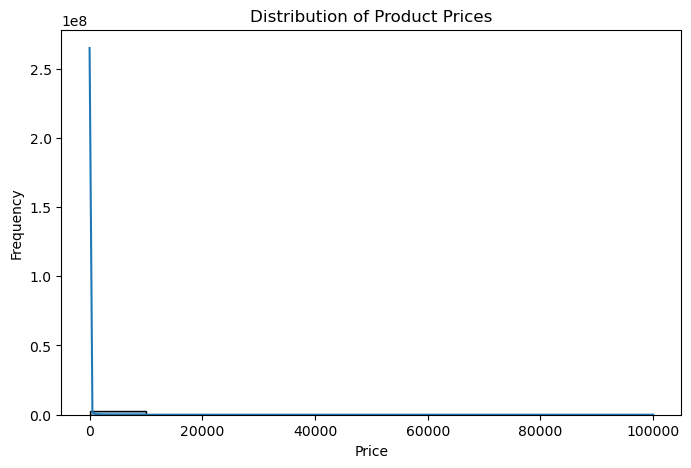

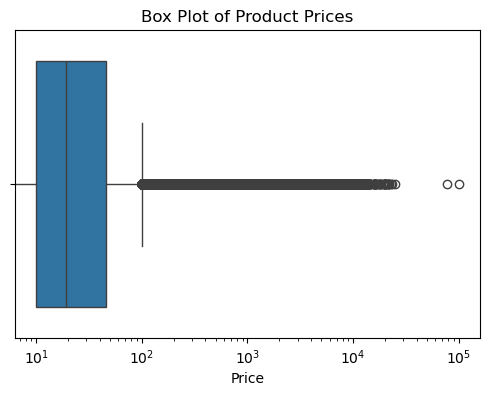

In [133]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(product_pricing, bins=10, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()



plt.figure(figsize=(6,4))
sns.boxplot(x=product_pricing)
plt.xscale('log')
plt.xlabel('Price')
plt.title('Box Plot of Product Prices')
plt.show()
# the box plot shows, that we have 2 outliers, that have a very high price. this makes the plot harder to read and analyze. 
# after adding log scale to the x-axis, the readabitly increased and shows that most products have a price between around £10 to £100


In [139]:
product_rating = df['stars']
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.00,2443651.00,2443651.00,2443651.00,2443651.00
mean,1370545.35,2.15,480.63,89.24,25.90
std,816056.17,2.19,5944.12,345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,658921.50,0.00,0.00,9.99,0.00
50%,1349029.00,0.00,0.00,19.09,0.00
75%,2060685.50,4.40,59.00,45.99,0.00
max,2828593.00,5.00,1356658.00,100000.00,50000.00


In [141]:
# calculate mode
statistics.mode(product_rating)

0.0

The mean 2,15 is bigger than the mode 0. The mode is equal to the median 0. The most common rating 0 indicates, that most products have no review. A standard variance of 2,19 indicate a notably variation from the average 2,15. 
Mostly customers, do not rate the products they buy. 

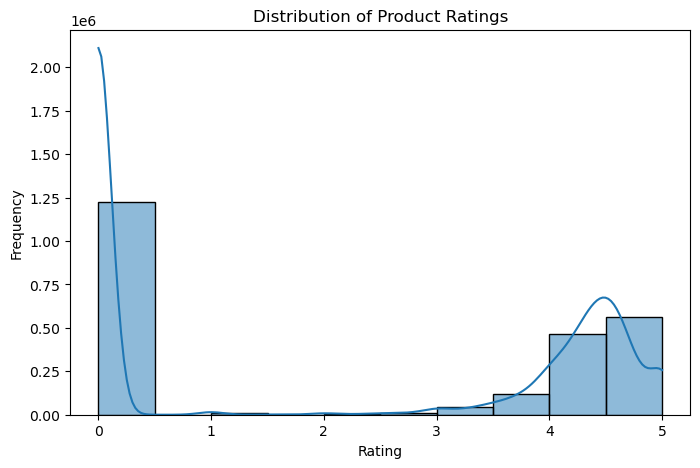

In [154]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(product_rating, bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()